../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_linear.pt


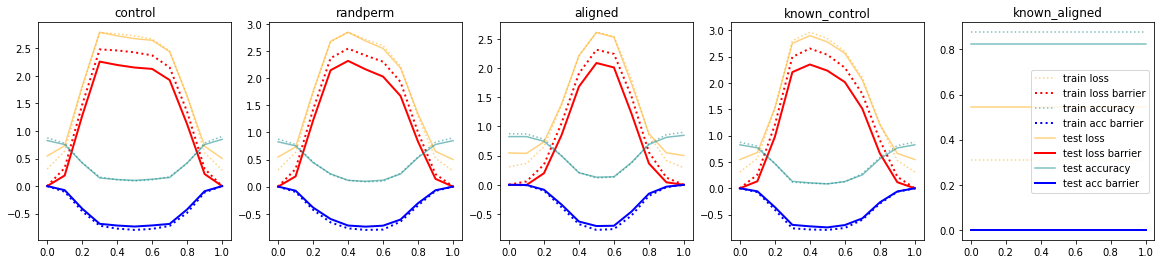

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep10_linear.pt


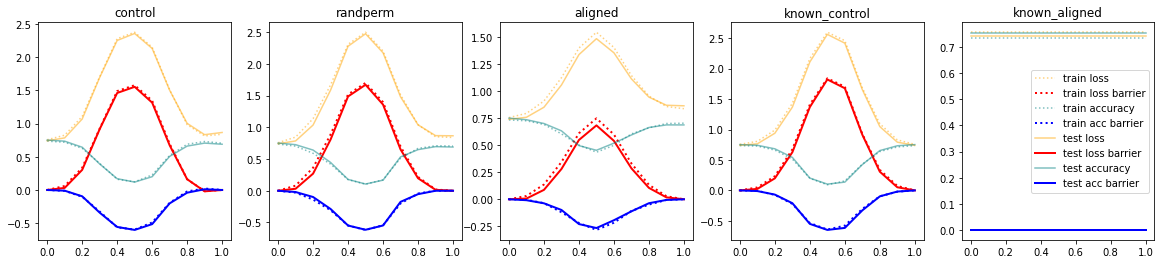

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep10_sqexp.pt


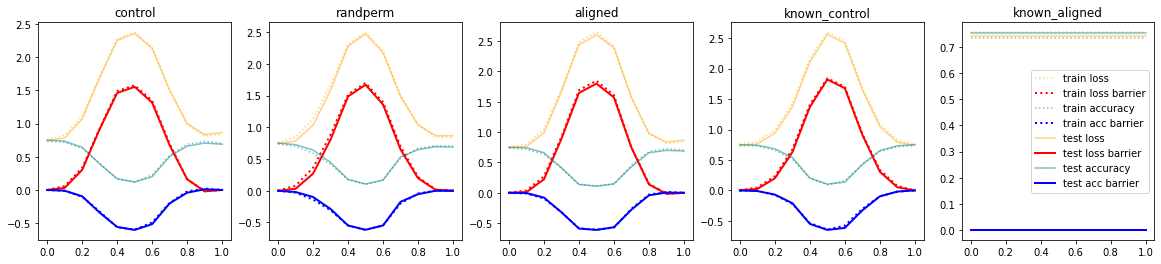

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep110_linear.pt


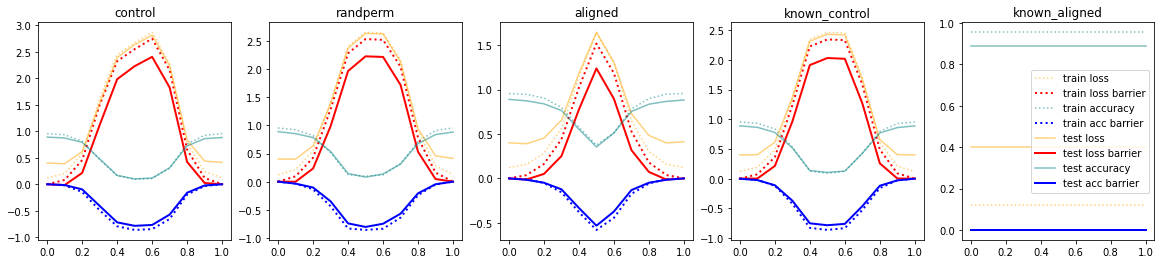

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep110_sqexp.pt


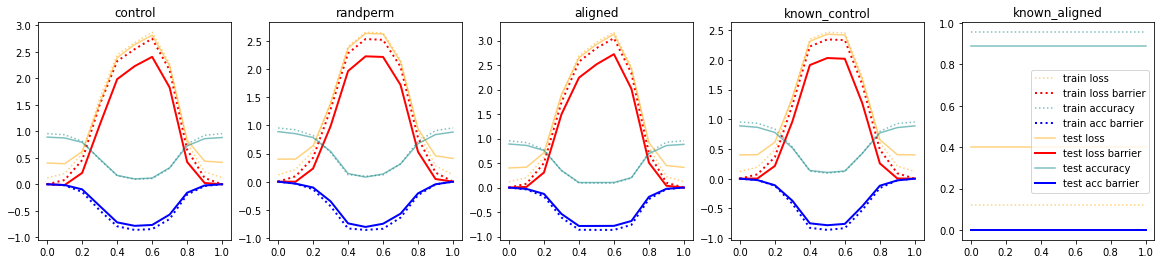

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_linear.pt


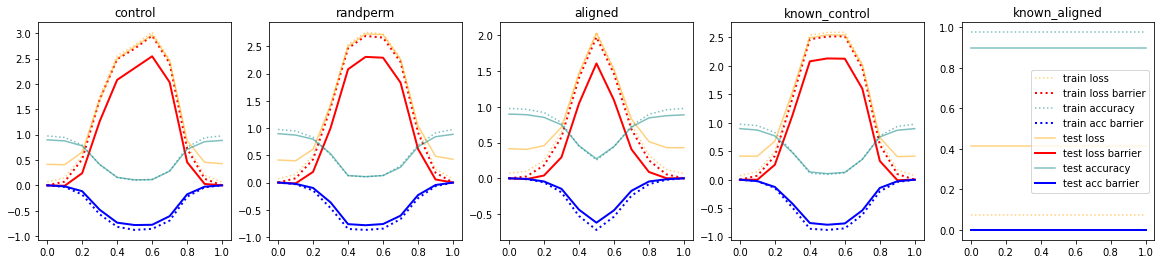

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_sqexp.pt


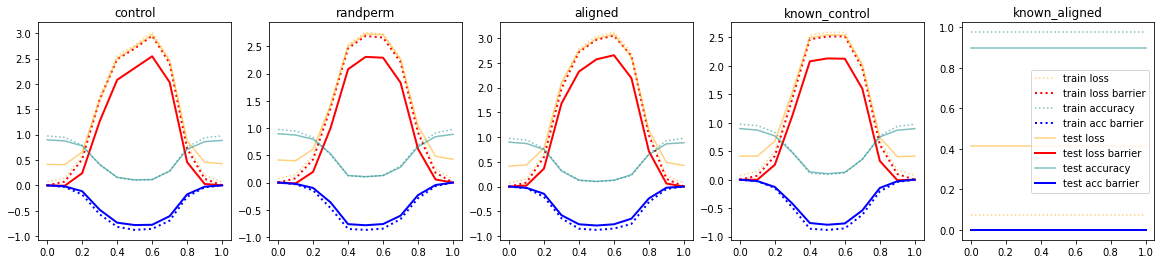

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep50_linear.pt


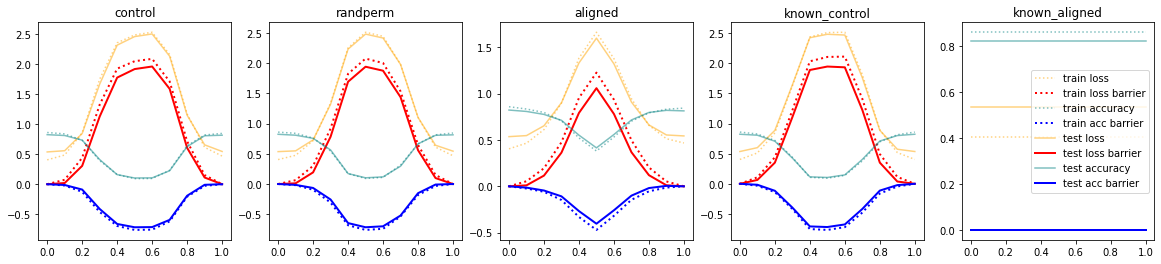

../refactor-outputs/debug/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep50_sqexp.pt


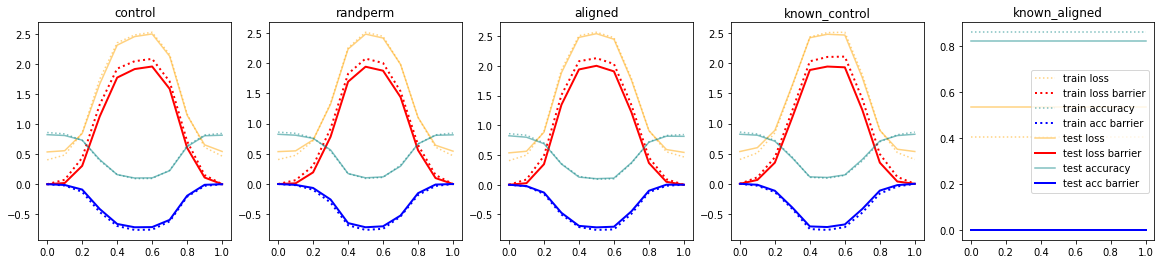

../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep10_linear.pt


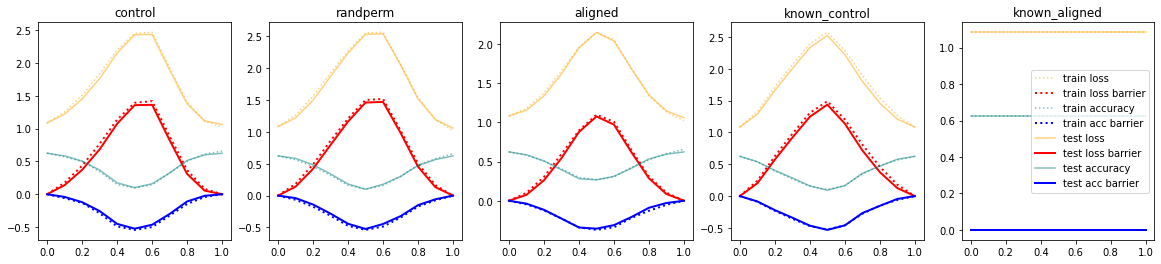

../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep10_sqexp.pt


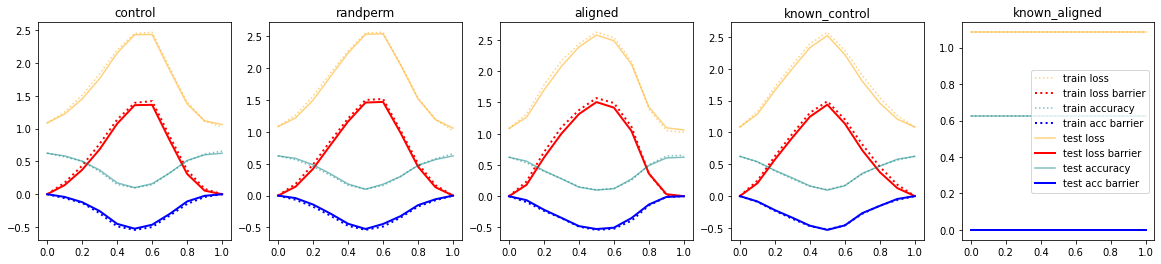

../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep110_linear.pt


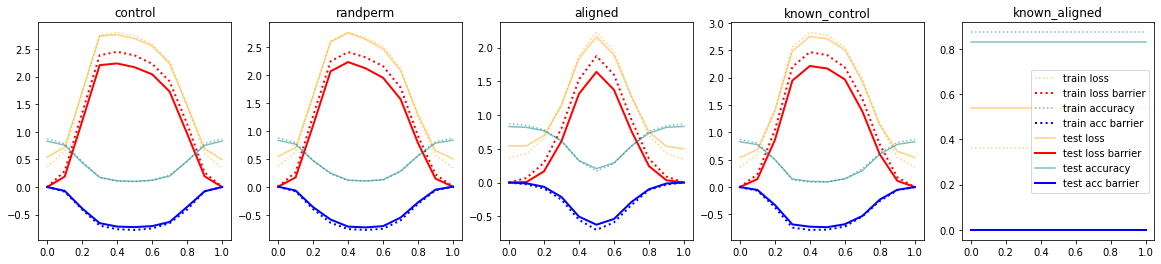

../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep110_sqexp.pt


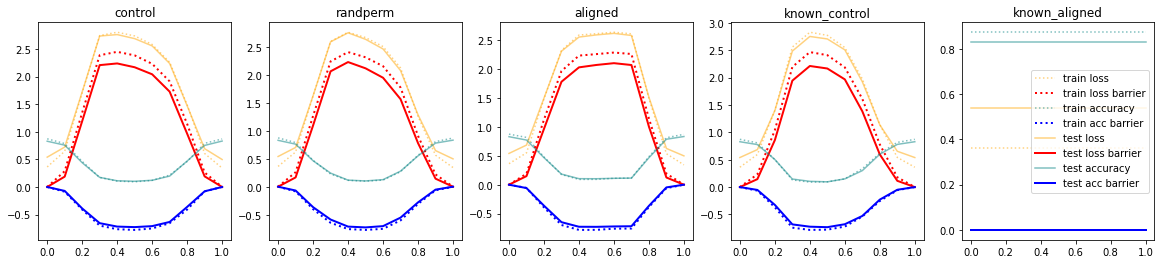

../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_sqexp.pt


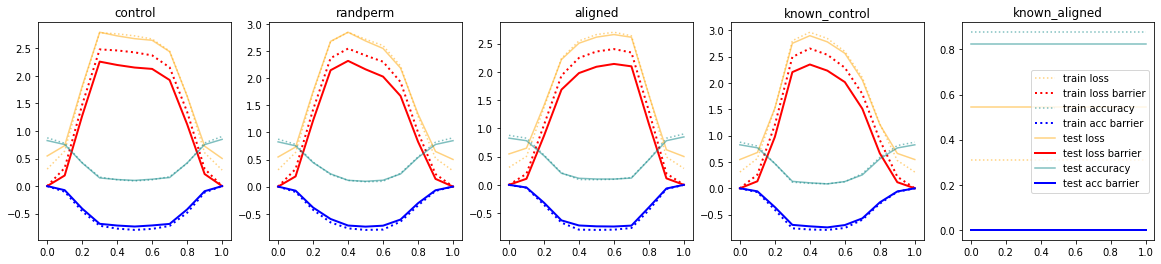

../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep50_linear.pt


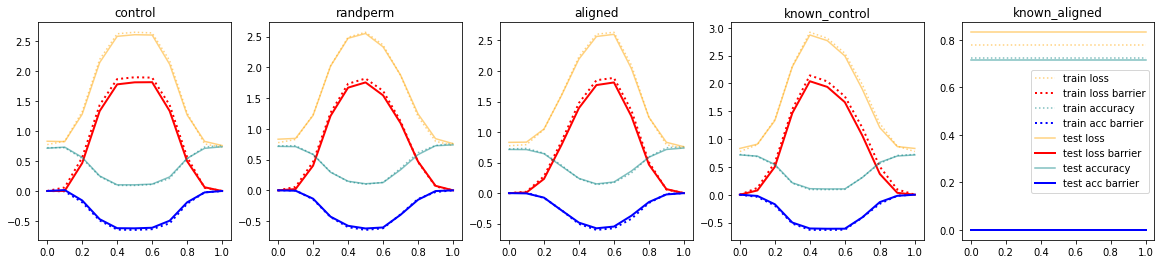

../refactor-outputs/debug/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep50_sqexp.pt


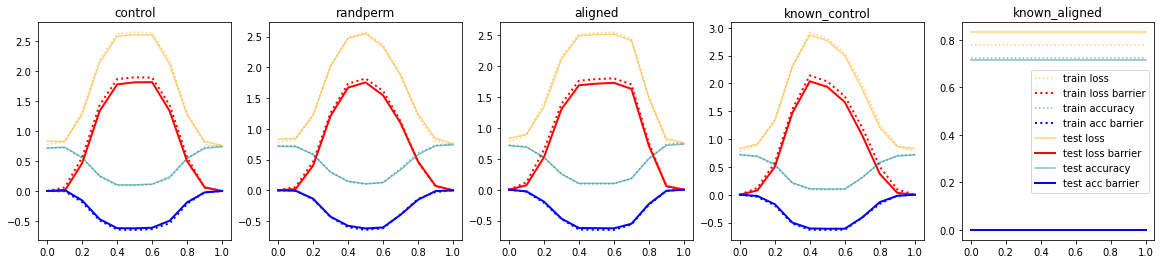

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep10_linear.pt


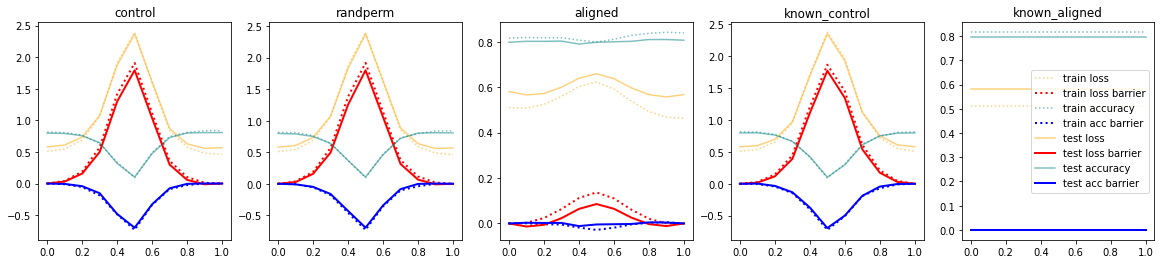

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep10_sqexp.pt


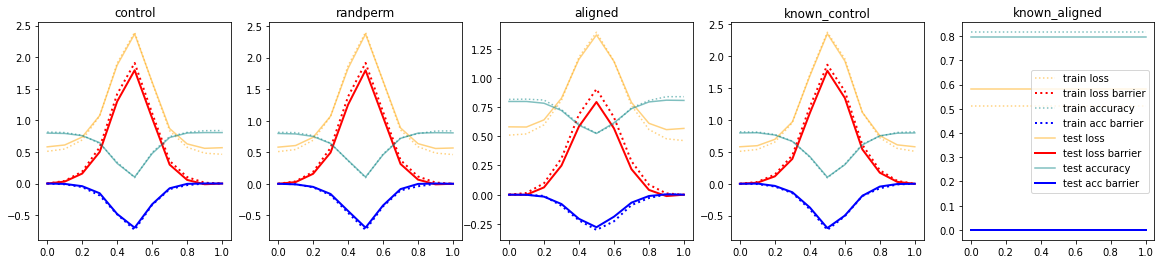

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep110_linear.pt


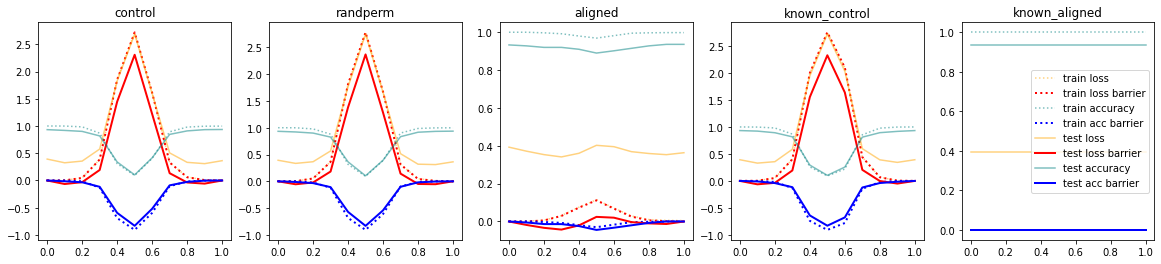

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep110_sqexp.pt


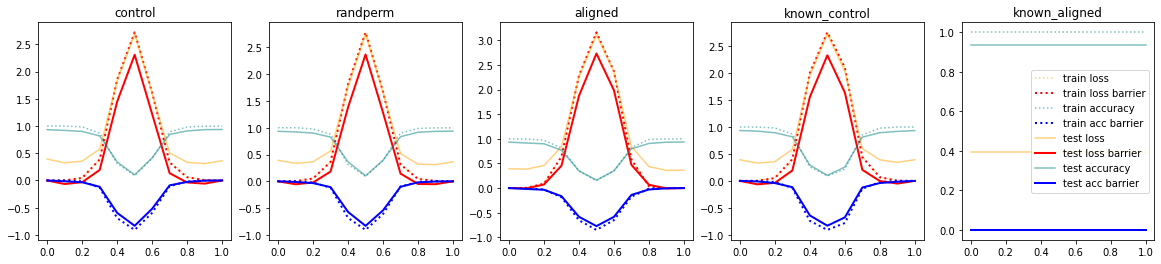

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep160_linear.pt


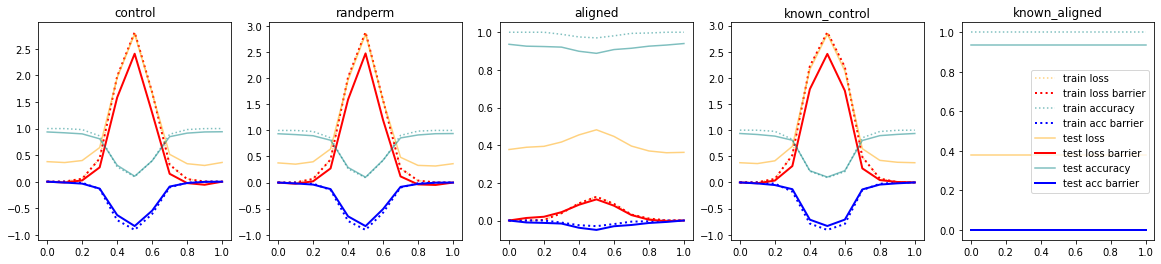

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep160_sqexp.pt


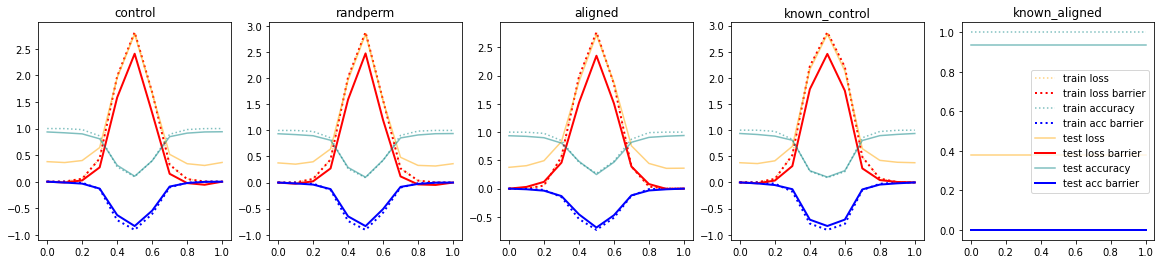

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep50_linear.pt


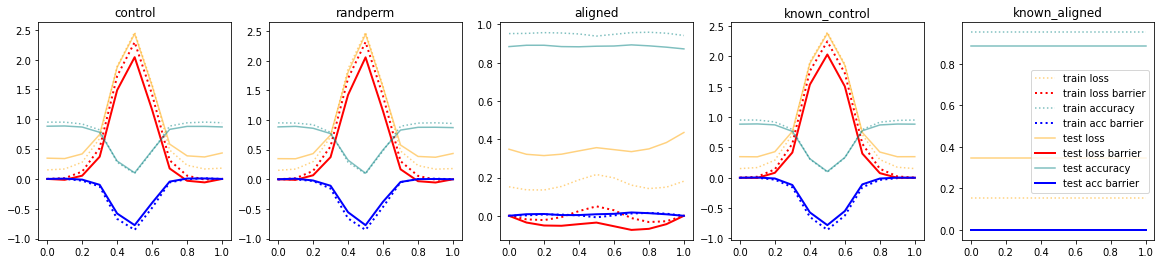

../refactor-outputs/debug/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep50_sqexp.pt


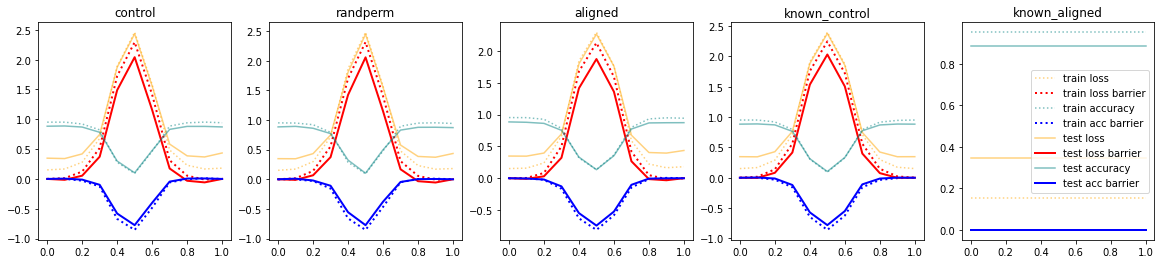

../refactor-outputs/debug/scratch/open_lth_data/lottery_a309ac4ab15380928661e70ca8b054a1_1_2_pretrain_ep50_linear.pt


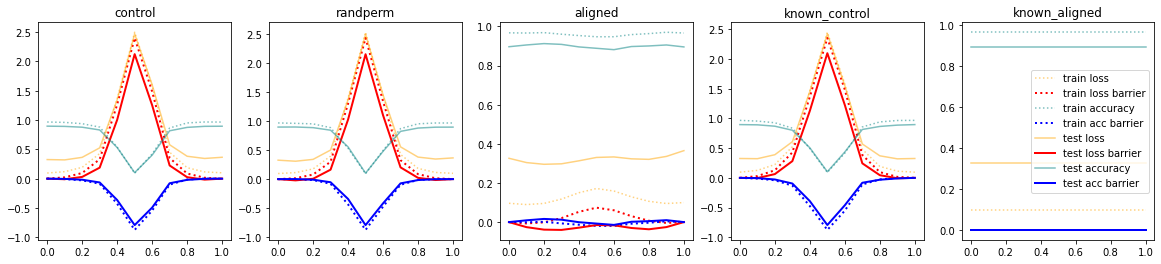

In [7]:
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")


def plot_barriers(ax, stats, is_train):
    interpolation = stats['interpolation']
    eval_loss = stats['eval_loss']
    acc = stats['acc']
    loss_barrier = stats['loss_barrier']
    acc_barrier = stats['acc_barrier']
    linestyle = 'dotted' if is_train else 'solid'
    label = 'train' if  is_train else 'test'
    ax.plot(interpolation, eval_loss, c='orange', linestyle=linestyle, alpha=0.5, label=f'{label} loss')
    ax.plot(interpolation, loss_barrier, c='red', linestyle=linestyle, linewidth=2, label=f'{label} loss barrier')
    ax.plot(interpolation, acc, c='teal', linestyle=linestyle, alpha=0.5, label=f'{label} accuracy')
    ax.plot(interpolation, acc_barrier, c='blue', linestyle=linestyle, linewidth=2, label=f'{label} acc barrier')

def plot_train_test_barriers(stats_dict, *suffixes):
    fig, axes = plt.subplots(nrows=1, ncols=len(suffixes), figsize=(4*len(suffixes), 4))
    for suffix, ax in zip(suffixes, axes):
        ax.set_title(suffix)
        plot_barriers(ax, stats_dict[f'train_{suffix}'], True)
        plot_barriers(ax, stats_dict[f'test_{suffix}'], False)
    plt.legend()
    plt.show()

stats_dir = Path("../refactor-outputs/debug/scratch/open_lth_data/")
# for file in stats_dir.glob("*.pt"):
for file in stats_dir.glob("*.pt"):
# for file in stats_dir.glob("*.pt"):
    stats_dict = torch.load(file)
    print(file)
    plot_train_test_barriers(stats_dict, "control", "randperm", "aligned", "known_control", "known_aligned")


../refactor-outputs/layernorm-base/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_linear.pt


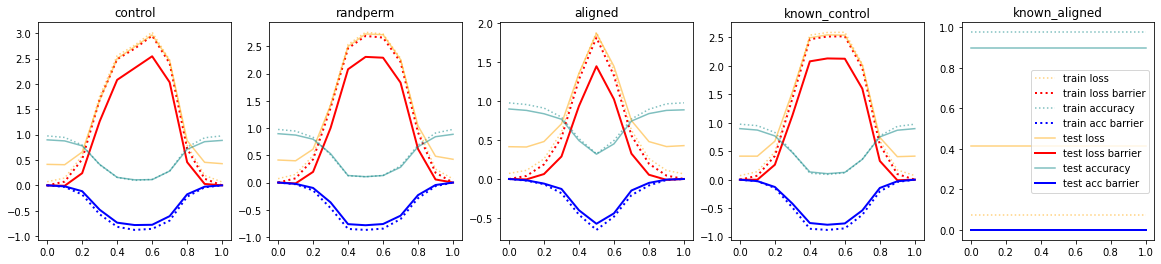

../refactor-outputs/layernorm-base/scratch/open_lth_data/lottery_a309ac4ab15380928661e70ca8b054a1_1_2_pretrain_ep160_linear.pt


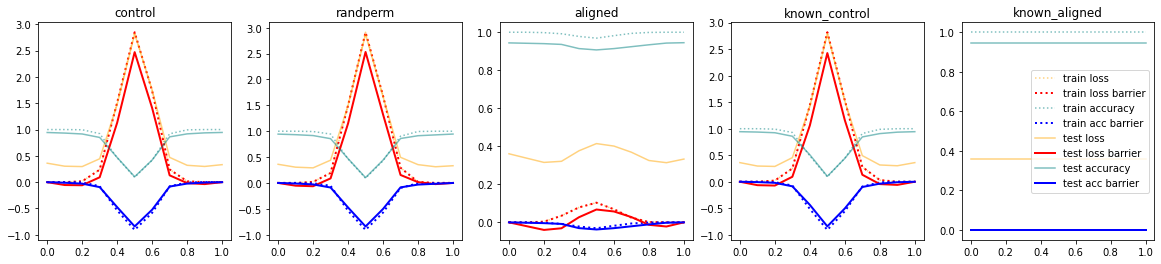

../refactor-outputs/layernorm-base/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_linear.pt


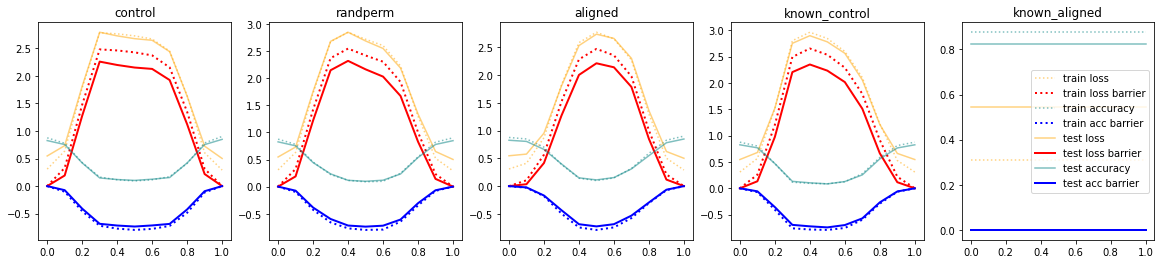

../refactor-outputs/layernorm-base/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep160_linear.pt


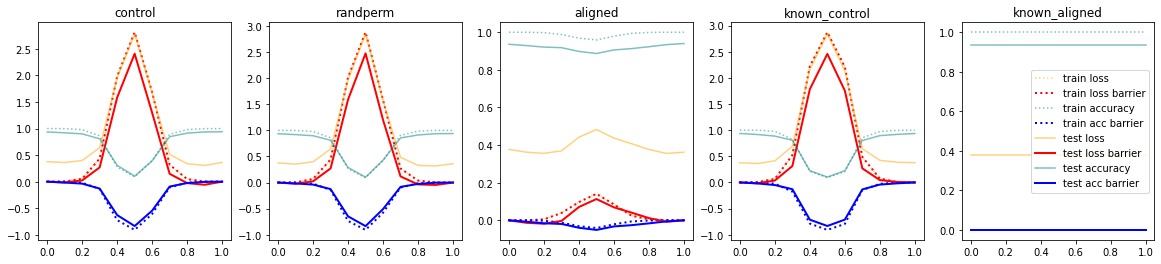

../refactor-outputs/layernorm-base/scratch/open_lth_data/lottery_c855d7c25ffef997a89799dc08931e82_1_2_pretrain_ep160_linear.pt


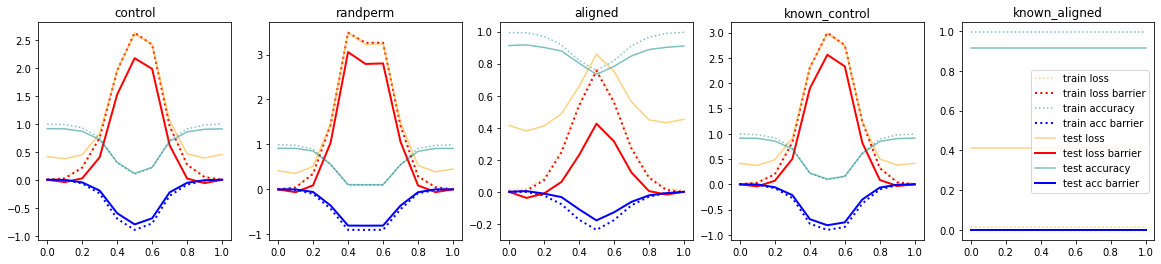

In [16]:
stats_dir = Path("../refactor-outputs/layernorm-base/scratch/open_lth_data/")
# for file in stats_dir.glob("*.pt"):
for file in stats_dir.glob("*pretrain_ep160_linear.pt"):
# for file in stats_dir.glob("*.pt"):
    stats_dict = torch.load(file)
    print(file)
    plot_train_test_barriers(stats_dict, "control", "randperm", "aligned", "known_control", "known_aligned")
